## 6.2. Exploratory data analysis: visualizations

## Table of contents:

### 1. Import libraries and dataset
### 2. Modify dataframe - transpose categorical values into separate columns
### 3. Conduct exploratory analysis:
#### - Correlation heatmap
#### - Scatterplot
#### - Pairplot
#### - Categorical plot
### 4. Answers and hypotheses
##

### 1. Import libraries and dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
# Create path
path = r'C:\Users\marta\OneDrive\Documents\A6 Personal Project'

In [3]:
# Import dataset 'emissions_temp_population'
emiss_temp_pop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'emissions_temp_population.pkl'))

In [4]:
# Check the result
emiss_temp_pop.head()

,country_code,country,emission_gas,agriculture_prod_stage,year,emissions,temp_change,total_population
0,4,Afghanistan,Emissions (CO2),Fertilizers Manufacturing,2002,44.587578,1.365,21000.256
1,4,Afghanistan,Emissions (CO2),Food Transport,2002,36.860881,1.365,21000.256
2,4,Afghanistan,Emissions (CH4),Food Transport,2002,0.003147,1.365,21000.256
3,4,Afghanistan,Emissions (N2O),Food Transport,2002,0.002172,1.365,21000.256
4,4,Afghanistan,Emissions (CO2),Food Retail,2002,2.357904,1.365,21000.256


In [5]:
# Check the shape
emiss_temp_pop.shape

(84960, 8)

### 2. Modify dataframe - transpose categorical values into separate columns

In [6]:
# Use set_index to move specified columns into index, then unstack to move the 'emission_gas' index level into the column index
df_modified = emiss_temp_pop.set_index(['country', 'country_code', 'agriculture_prod_stage', 'year', 'temp_change', 'total_population', 'emission_gas']).unstack(['emission_gas'])

In [7]:
# Check the output
df_modified.head()

emissions  \
emission_gas                                                                      Emissions (CH4)   
country     country_code agriculture_prod_stage year temp_change total_population                   
Afghanistan 4            Domestic Wastewater    2002 1.365       21000.256              28.870985   
                                                2003 0.587       22645.130              30.250737   
                                                2004 1.373       23553.551              31.586700   
                                                2005 0.401       24411.191              32.771628   
                                                2006 1.720       25442.944              33.766473   

                                                                                                   \
emission_gas                                                                      Emissions (CO2)   
country     country_code agriculture_prod_stage year temp_change total_population                   
Afghanistan 4            Domestic Wastewater    2002 1.365       21000.256                    NaN   
                                                2003 0.587       22645.130                    NaN   
                                                2004 1.373       23553.551                    NaN   
                                                2005 0.401       24411.191                    NaN   
                                                2006 1.720       25442.944                    NaN   

                                                                                                   
emission_gas                                                                      Emissions (N2O)  
country     country_code agriculture_prod_stage year temp_change total_population                  
Afghanistan 4            Domestic Wastewater    2002 1.365       21000.256               0.411351  
                                                2003 0.587       22645.130               0.440623  
                                                2004 1.373       23553.551               0.465987  
                                                2005 0.401       24411.191               0.468327  
                                                2006 1.720       25442.944               0.482093

In [8]:
# Check the shape
df_modified.shape

(36000, 3)

In [9]:
# Join multiindex into one index
df_modified.columns = [' '.join(col).strip() for col in df_modified.columns.values]

In [10]:
# Check result
df_modified.head()

emissions Emissions (CH4)  \
country     country_code agriculture_prod_stage year temp_change total_population                              
Afghanistan 4            Domestic Wastewater    2002 1.365       21000.256                         28.870985   
                                                2003 0.587       22645.130                         30.250737   
                                                2004 1.373       23553.551                         31.586700   
                                                2005 0.401       24411.191                         32.771628   
                                                2006 1.720       25442.944                         33.766473   

                                                                                   emissions Emissions (CO2)  \
country     country_code agriculture_prod_stage year temp_change total_population                              
Afghanistan 4            Domestic Wastewater    2002 1.365       21000.256                               NaN   
                                                2003 0.587       22645.130                               NaN   
                                                2004 1.373       23553.551                               NaN   
                                                2005 0.401       24411.191                               NaN   
                                                2006 1.720       25442.944                               NaN   

                                                                                   emissions Emissions (N2O)  
country     country_code agriculture_prod_stage year temp_change total_population                             
Afghanistan 4            Domestic Wastewater    2002 1.365       21000.256                          0.411351  
                                                2003 0.587       22645.130                          0.440623  
                                                2004 1.373       23553.551                          0.465987  
                                                2005 0.401       24411.191                          0.468327  
                                                2006 1.720       25442.944                          0.482093

In [11]:
# Flatten the index at all levels
df_modified = pd.DataFrame(df_modified.to_records())

In [12]:
# Check results
df_modified.head()

,country,country_code,agriculture_prod_stage,year,temp_change,total_population,emissions Emissions (CH4),emissions Emissions (CO2),emissions Emissions (N2O)
0,Afghanistan,4,Domestic Wastewater,2002,1.365,21000.256,28.870985,NaN,0.411351
1,Afghanistan,4,Domestic Wastewater,2003,0.587,22645.130,30.250737,NaN,0.440623
2,Afghanistan,4,Domestic Wastewater,2004,1.373,23553.551,31.586700,NaN,0.465987
3,Afghanistan,4,Domestic Wastewater,2005,0.401,24411.191,32.771628,NaN,0.468327
4,Afghanistan,4,Domestic Wastewater,2006,1.720,25442.944,33.766473,NaN,0.482093


In [13]:
# Check results
df_modified.shape

(36000, 9)

In [14]:
# Rename columns to simplify names 
df_modified.rename(columns = {'emissions Emissions (CH4)' : 'emissions_CH4', 'emissions Emissions (CO2)' : 'emissions_CO2', 'emissions Emissions (N2O)' : 'emissions_N2O'}, inplace = True)

In [15]:
# Export modified dataframe
df_modified.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'emissions_temp_pop_modified.pkl'))

## 3. Conduct exploratory analysis

In [16]:
# Create a subset dataframe with columns below
df_subset = df_modified[['emissions_CH4' , 'emissions_CO2', 'emissions_N2O', 'temp_change', 'total_population']]

In [17]:
# Check the output
df_subset.head(3)

,emissions_CH4,emissions_CO2,emissions_N2O,temp_change,total_population
0,28.870985,NaN,0.411351,1.365,21000.256
1,30.250737,NaN,0.440623,0.587,22645.130
2,31.586700,NaN,0.465987,1.373,23553.551


### -- Correlation heatmap

Text(0.5, 1.0, 'Correlation Matrix')

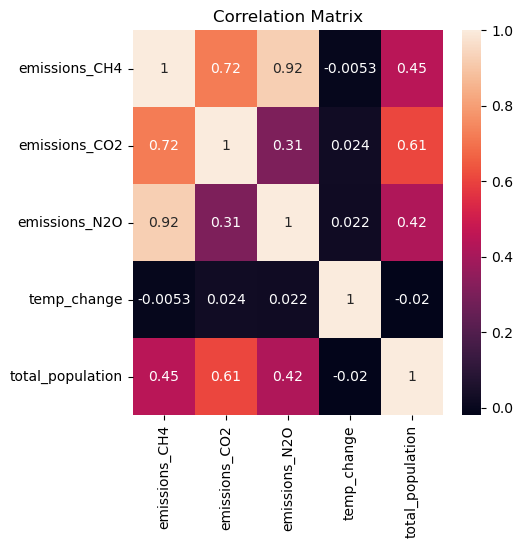

In [18]:
# Create heatmap using seaborn
f,ax = plt.subplots(figsize=(5,5))
corr_all = sns.heatmap(df_subset.corr(), annot = True, ax = ax)
plt.title('Correlation Matrix', fontsize=12)

In [19]:
# Export heatmap
corr_all.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'correlation_heatmap.png'),bbox_inches='tight')


- The heatmap shows positive strong correlation between emissions of CH4 and CO2; CH4 and N2O. <br>
- There is strong relationship between total population and CO2 emissions, meaning if the population number goes up, CO2 emissions increase as well. <br>
- Total popualtion has medium positive correlation with the other greenhouse gas emissions: Ch4 and N2O. <br>
- The relationships between all gas emissions and temperature changes are weak. 

### -- Scatterplot

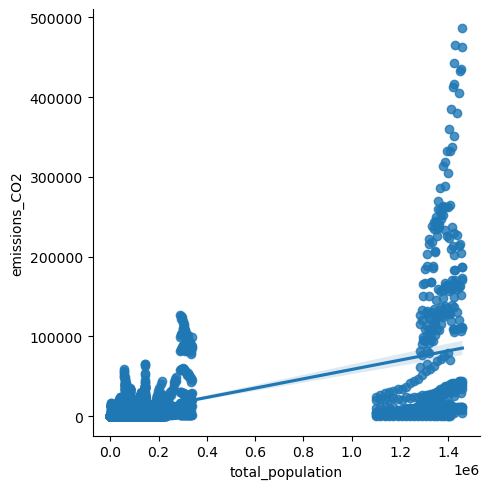

In [20]:
# Create a scatterplot for 'total_population' and 'emissions_CO2'
sns.lmplot(x = 'total_population', y = 'emissions_CO2', data = df_subset)

It seems that the relationship between total population and CO2 emissions is not linear. We can see that when the population number is lower than 400 million, the emissions amount is also low. Once the population goes above 1 billion, the emissions tend to get higher, and more ouliers are present. 

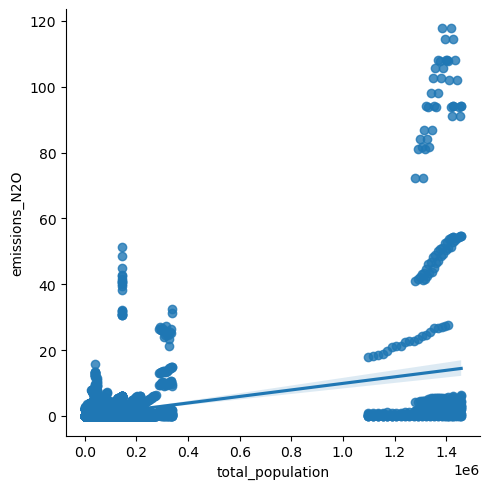

In [21]:
# Create a scatterplot for 'total_population' and 'emissions_N2O'
sns.lmplot(x = 'total_population', y = 'emissions_N2O', data = df_subset)

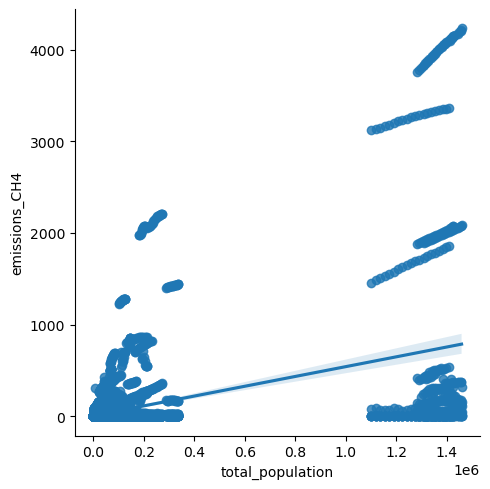

In [22]:
# Create a scatterplot for 'total_population' and 'emissions_CH4'
sns.lmplot(x = 'total_population', y = 'emissions_CH4', data = df_subset)

The same is true for other greenhouse gas emissions: the relationbship between them and total population is not linear.

### -- Pairplot

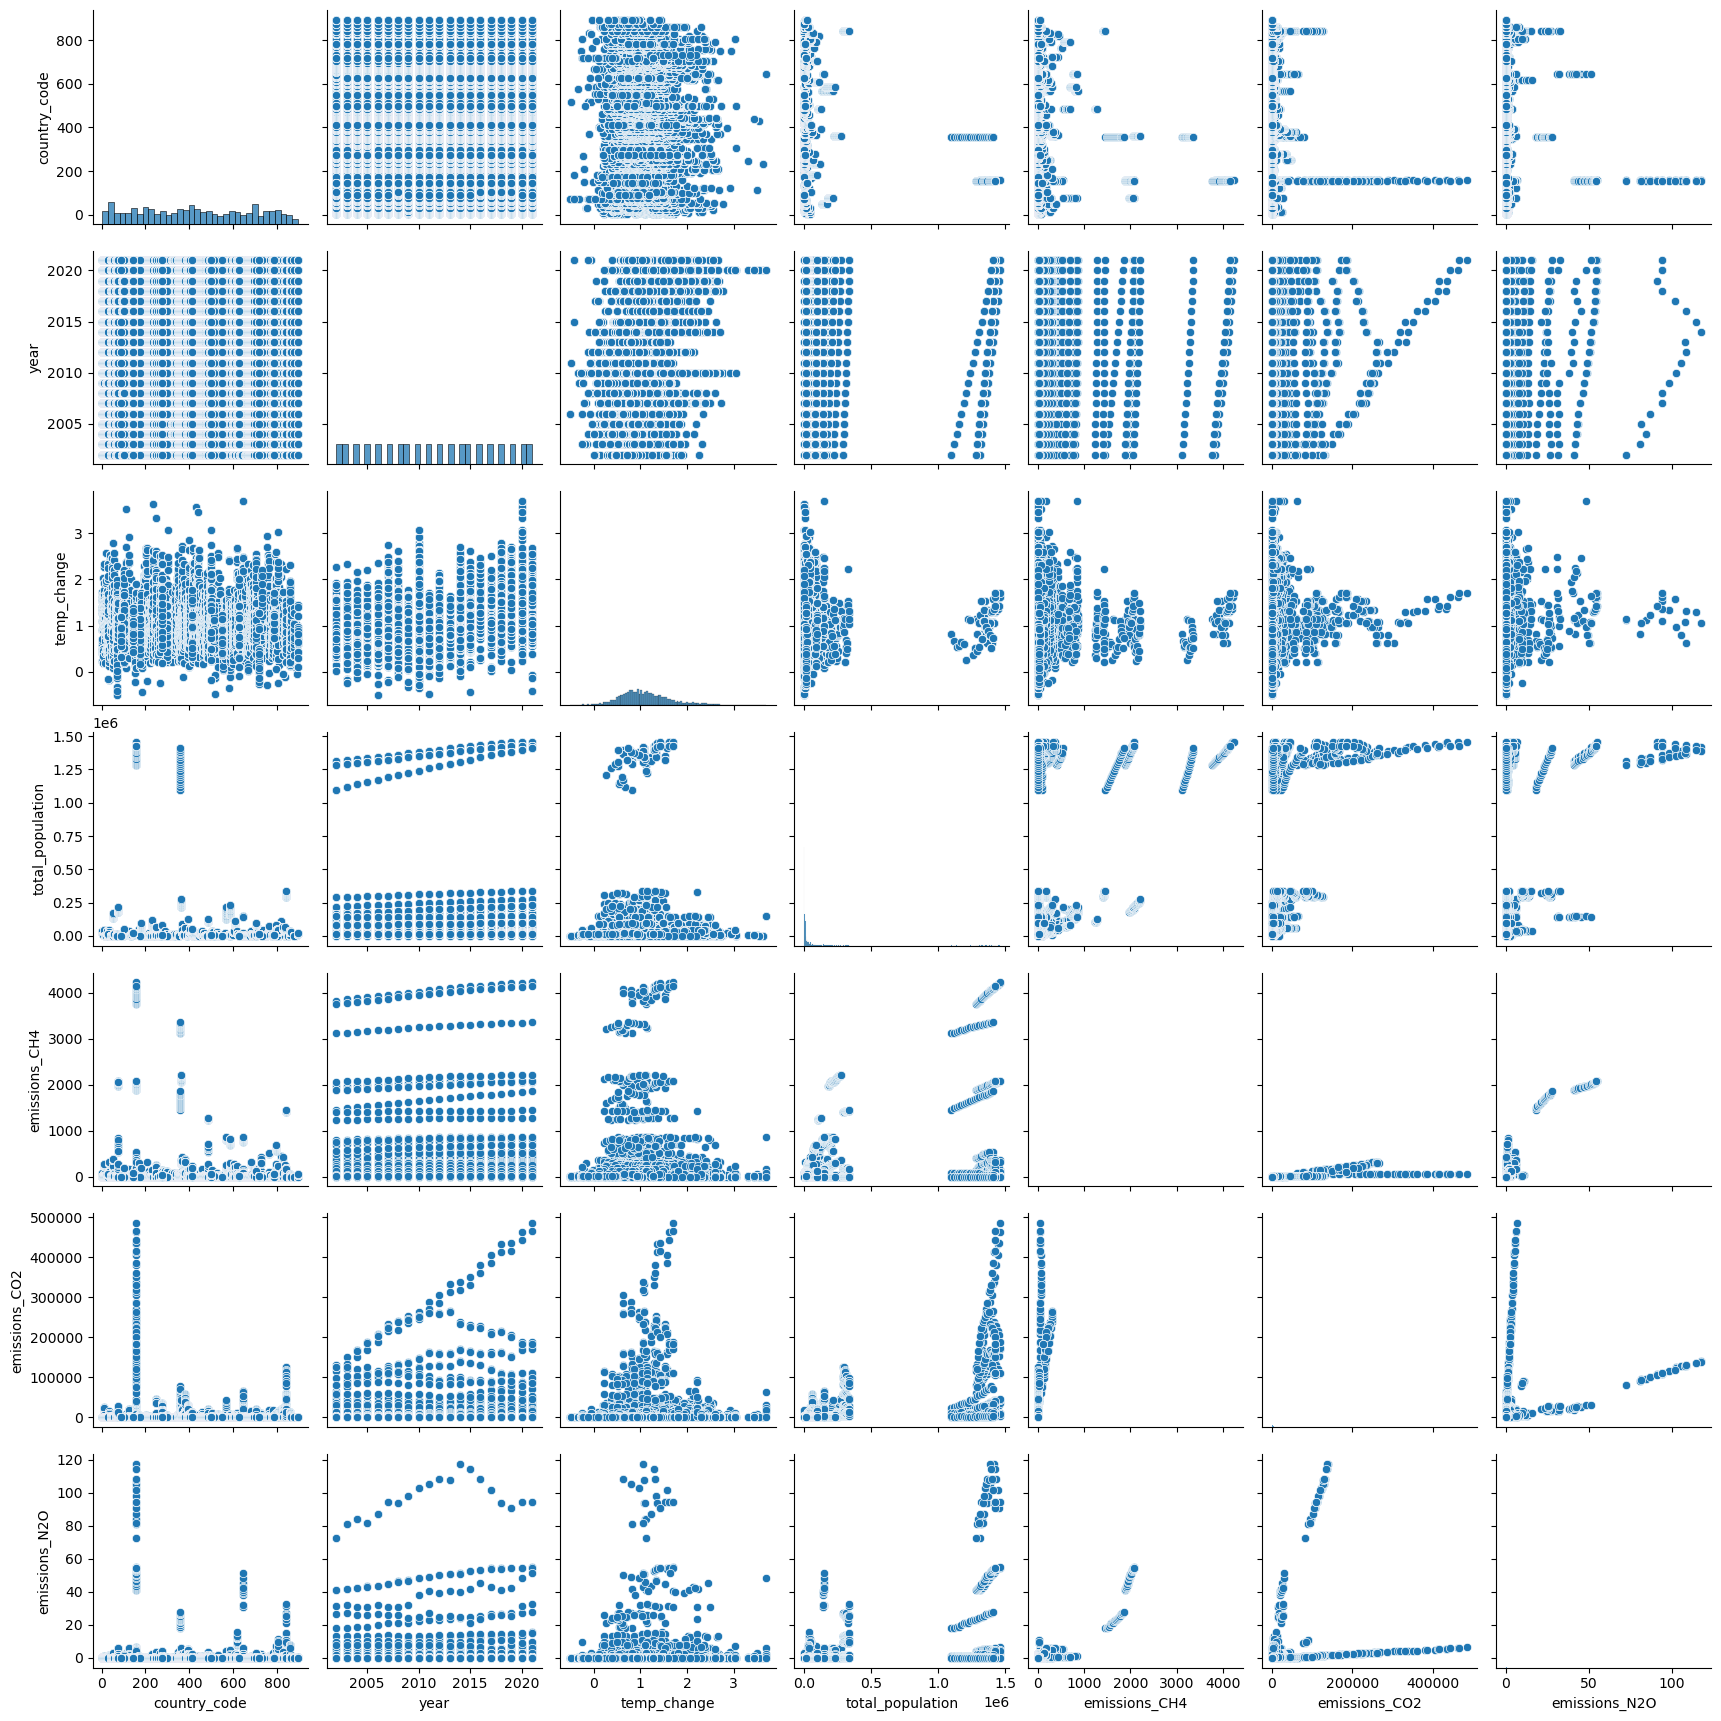

In [23]:
# Create pairplot for all variables within df_modified
pairplot_all = sns.pairplot(df_modified)

- Temperature change has normal distribution, while total population has a right-skewed one.
- CH4 emissions and N2O emissions seem to have exponential relationship.
- CO2 and CH4 emissions are plotted close to almost horizontal line, which indicates the absence of relationship.

The yearly emission of greenhouse gases should be explored in more detail, as different patterns are observed for different gas types.

Text(0.5, 1.0, 'Distribution of CH4 Emissions')

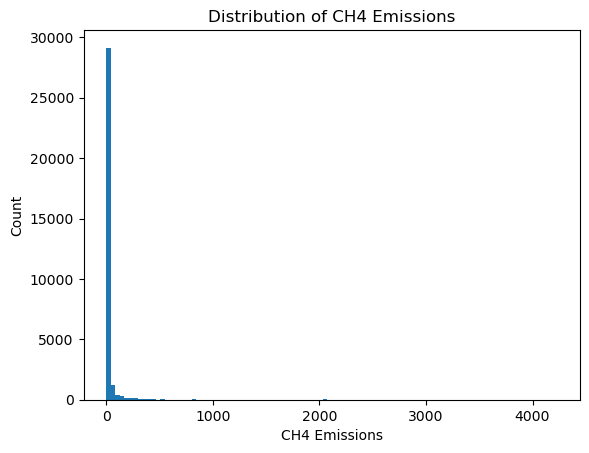

In [24]:
# Create histogram for 'emissions_CH4' column
hist = df_modified['emissions_CH4'].plot.hist(bins = 100)
plt.xlabel('CH4 Emissions')
plt.ylabel('Count')
plt.title('Distribution of CH4 Emissions')

In [25]:
# Check how many extreme values
pd.set_option('display.max_rows', None)
df_modified[df_modified['emissions_CH4'] >1000]

,country,country_code,agriculture_prod_stage,year,temp_change,total_population,emissions_CH4,emissions_CO2,emissions_N2O
4712,Brazil,76,Solid Food Waste,2002,1.052,180476.685,1979.318045,NaN,NaN
4713,Brazil,76,Solid Food Waste,2003,0.927,182629.278,1978.188601,NaN,NaN
4714,Brazil,76,Solid Food Waste,2004,0.768,184722.043,1981.945715,NaN,NaN
4715,Brazil,76,Solid Food Waste,2005,1.085,186797.334,1991.539919,NaN,NaN
4716,Brazil,76,Solid Food Waste,2006,0.770,188820.682,2003.081969,NaN,NaN
4717,Brazil,76,Solid Food Waste,2007,0.969,190779.453,2016.433868,NaN,NaN
4718,Brazil,76,Solid Food Waste,2008,0.731,192672.317,2029.988245,NaN,NaN
4719,Brazil,76,Solid Food Waste,2009,0.969,194517.549,2038.322158,NaN,NaN
4720,Brazil,76,Solid Food Waste,2010,1.112,196353.492,2051.164402,NaN,NaN
4721,Brazil,76,Solid Food Waste,2011,0.814,198185.302,2063.667718,NaN,NaN


Text(0.5, 1.0, 'Distribution of CO2 Emissions')

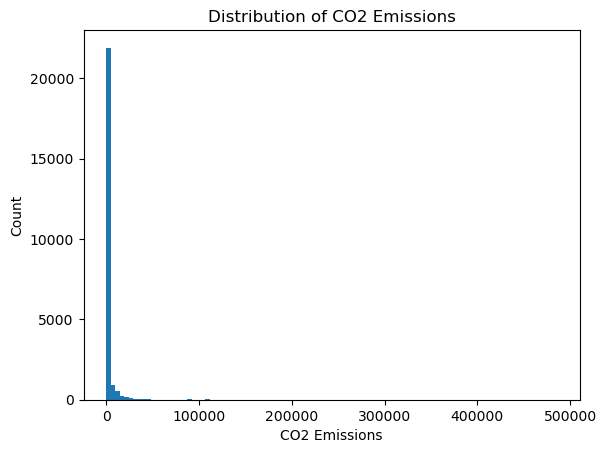

In [26]:
# Create histogram for 'emissions_CO2' column
hist = df_modified['emissions_CO2'].plot.hist(bins = 100)
plt.xlabel('CO2 Emissions')
plt.ylabel('Count')
plt.title('Distribution of CO2 Emissions')

In [27]:
# Check how many extreme values
pd.set_option('display.max_rows', None)
df_modified[df_modified['emissions_CO2'] >80000]

,country,country_code,agriculture_prod_stage,year,temp_change,total_population,emissions_CH4,emissions_CO2,emissions_N2O
6693,China,159,Fertilizers Manufacturing,2002,1.130,1310694.248,NaN,81777.314267,72.347430
6694,China,159,Fertilizers Manufacturing,2003,0.822,1318816.038,NaN,91433.092621,81.020981
6695,China,159,Fertilizers Manufacturing,2004,1.109,1326911.337,NaN,95932.678358,84.108822
6696,China,159,Fertilizers Manufacturing,2005,1.047,1335109.361,NaN,94812.915245,81.643862
6697,China,159,Fertilizers Manufacturing,2006,1.230,1343424.000,NaN,101755.326784,86.952181
6698,China,159,Fertilizers Manufacturing,2007,1.535,1351972.318,NaN,109109.110849,94.291354
6699,China,159,Fertilizers Manufacturing,2008,1.088,1360745.184,NaN,108357.864659,93.942090
6700,China,159,Fertilizers Manufacturing,2009,1.334,1369807.293,NaN,116044.521553,98.097358
6701,China,159,Fertilizers Manufacturing,2010,0.966,1378964.186,NaN,124430.164433,102.751993
6702,China,159,Fertilizers Manufacturing,2011,0.789,1387984.919,NaN,129272.989429,105.623232


Text(0.5, 1.0, 'Distribution of N2O Emissions')

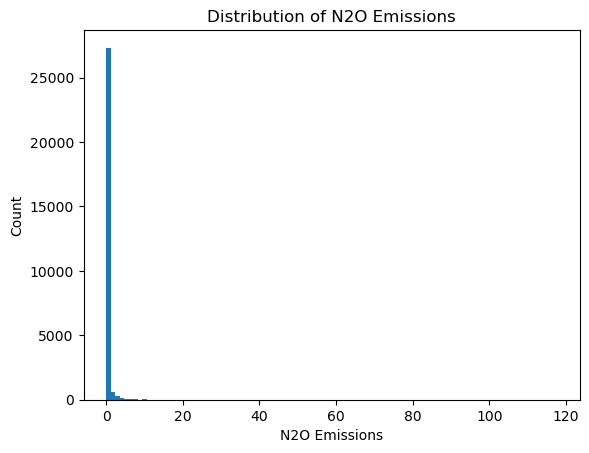

In [28]:
# Create histogram for 'emissions_N2O' column
hist = df_modified['emissions_N2O'].plot.hist(bins = 100)
plt.xlabel('N2O Emissions')
plt.ylabel('Count')
plt.title('Distribution of N2O Emissions')

In [29]:
# Check how many extreme values
pd.set_option('display.max_rows', None)
df_modified[df_modified['emissions_N2O'] >20]

,country,country_code,agriculture_prod_stage,year,temp_change,total_population,emissions_CH4,emissions_CO2,emissions_N2O
6673,China,159,Domestic Wastewater,2002,1.130,1310694.248,1886.932615,NaN,41.187513
6674,China,159,Domestic Wastewater,2003,0.822,1318816.038,1898.664797,NaN,41.736992
6675,China,159,Domestic Wastewater,2004,1.109,1326911.337,1910.001251,NaN,42.549853
6676,China,159,Domestic Wastewater,2005,1.047,1335109.361,1921.265299,NaN,43.326045
6677,China,159,Domestic Wastewater,2006,1.230,1343424.000,1932.040297,NaN,43.650988
6678,China,159,Domestic Wastewater,2007,1.535,1351972.318,1942.195679,NaN,44.914191
6679,China,159,Domestic Wastewater,2008,1.088,1360745.184,1952.190059,NaN,46.529197
6680,China,159,Domestic Wastewater,2009,1.334,1369807.293,1961.910485,NaN,47.158034
6681,China,159,Domestic Wastewater,2010,0.966,1378964.186,1971.441609,NaN,48.574535
6682,China,159,Domestic Wastewater,2011,0.789,1387984.919,1982.266955,NaN,49.194378


The distribution for of all gas emissions is right-skewed, which means most of the countries have low emissions of each type of gas.

### -- Categorical plot

<Axes: xlabel='total_population', ylabel='Count'>

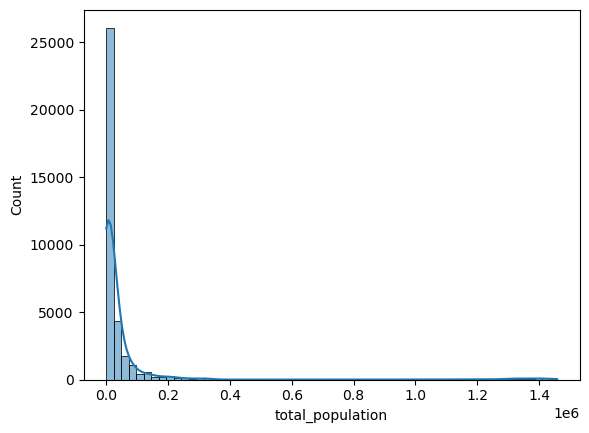

In [30]:
# Create histogram for total_population variable
sns.histplot(df_modified['total_population'], bins = 60, kde = True)

In [31]:
# Create population category
df_modified.loc[df_modified['total_population'] < 1000000, 'population_category'] = 'Low population'

In [32]:
# Create population category
df_modified.loc[df_modified['total_population'] >= 1000000, 'population_category'] = 'Large population'

In [33]:
# Frequency distribution of population_category
df_modified['population_category'].value_counts(dropna = False)

population_category
Low population      35340
Large population      660
Name: count, dtype: int64

In [34]:
# Check dataframe columns
df_modified.columns

Index(['country', 'country_code', 'agriculture_prod_stage', 'year',
       'temp_change', 'total_population', 'emissions_CH4', 'emissions_CO2',
       'emissions_N2O', 'population_category'],
      dtype='object')

In [35]:
# Export modified dataframe
df_modified.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'emissions_temp_pop_modified.pkl'))

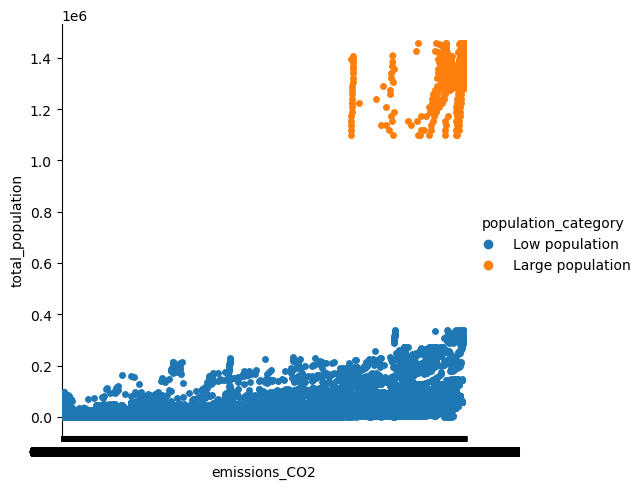

In [36]:
# Create a categorical plot in seaborn using the population categories created above


category_plot = sns.catplot(x='emissions_CO2', y='total_population', hue='population_category', data=df_modified)

As my dataframe doesn't have any numeric categorical variables, I decided to build a catplot for population and CO2 emissions (mostly for learning purposes). The plot shows that large population equates to higher carbon dioxide emissions.  

### 4. Answers and hypotheses

- Can countries be classified based on the gas emissions level? <br>
Yes, countries with large population have higher gas emissions.
<br><br>
- Is there a relationship between the country population and gas emissions? <br>
The visualizations didn't show any linear relationship between population number and gas emissions, but high greenhouse gas emissions are associated only with countries that have large population.
<br><br>
- Do gas emissions affect the temperature change? <br>
The correlation plots for greenhouse gas emissions and temperature changes don't show any correlation between variables (if we drow a line of best fit, it will be vertical). But this makes sense, as the amount of gases that were emitted per one year might have impact on the temperature only after a couple of years. That's why it might be better idea to use lag variable to check the correlation between gas emissions and temperature change in 4 years.

#### Hypotheses:
- Countries with large population release more CO2.<br><br>
- Countries with large population release more N2O.<br><br>
- Countries with large population release more CH4.<br><br>
- Total greenhouse gas emissions causes bigger changes in temperature in 4 years.